### PCA

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.cluster.hierarchy import dendrogram, linkage

In [30]:
sns.set(font="monospace")
sns.set(font_scale=1.8)
#sns.set_palette("YlGnBu")

### Data

In [31]:
data = pd.read_csv('../datareader/score/score.csv')
data = data.set_index('Protein')
ndf = data.copy(deep =True)

In [32]:
ndf.head(2)

,ARR,CHD,CM,CVA,IHD,VD
Protein,,,,,,
alpha-1-antitrypsin,0.009000,0.120724,0.036423,0.047402,0.103137,0.023655
mothers_against_decapentaplegic_homolog_4,0.005316,0.080604,0.056011,0.010512,0.039842,0.000000


In [33]:
ndf.shape

(2702, 6)

----------------

In [34]:
tdata = ndf.copy(deep =True)

In [35]:
clrs = []
for row,col in tdata.T.iteritems():
    val = np.array(col)
    mx = max(val)
    for item in val:
        if  mx == col[0]:
            grp =  'mediumslateblue'
        elif mx == col[1]:
            grp =  'deepskyblue'
        elif mx == col[2]:
            grp = 'firebrick'
        elif mx == col[3]:
            grp = 'navy'
        elif mx == col[4]:
            grp = 'green'
        elif mx == col[5]:
            grp = 'darkgoldenrod'
    clrs.append(grp)

--------

###  PCA 3D: Proteins

In [36]:
pdata = ndf.copy(deep = True)

In [37]:
def pcadata_3dinv(data):
   
    transposeDf = data
    pca = PCA(n_components=3)
    new_data = pca.fit_transform(transposeDf)
   
    matrix = np.array(new_data)
    matrix = matrix.T
   
    x = matrix[0]
    y = matrix[1]
    z = matrix[2]
    
    #print('new_data is:',new_data)
    print('explained variance ratio:', pca.explained_variance_ratio_)
    print('sum  of explained variance ratio',sum(pca.explained_variance_ratio_))
    
    return x,y,z

explained variance ratio: [0.35131574 0.20029657 0.15611879]
sum  of explained variance ratio 0.7077311027749149


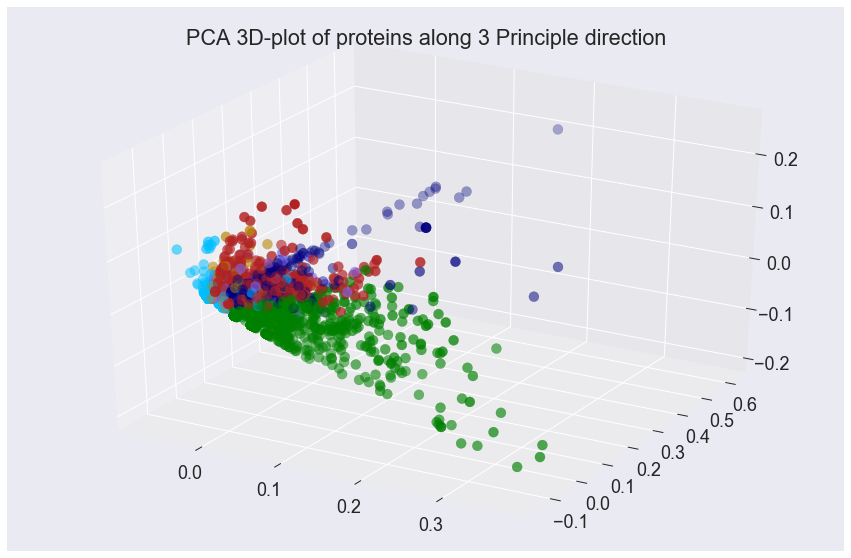

In [38]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = [15,10])
mpl.rcParams['legend.fontsize'] = 100

ax = fig.gca(projection='3d')
plt.title('PCA 3D-plot of proteins along 3 Principle direction')

x,y,z = pcadata_3dinv(pdata)

ax.scatter(x, y, z, label='pca', s=100,color = clrs)

plt.savefig('pca-protein-3d.png')

---------